---
title: "Data Touring 2"
author: "Y Lee"
date: "`r Sys.Date()`"
output: html_document
---

In [1]:
import pandas as pd
from plotnine import *
from plotnine.data import *

import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt  
import seaborn as sns
import scipy
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Touring 2

* Data

    - Iris, Penguins
    
    - MNIST, Cifar10, Cifar100
    
    - Sunspots, Trees, Faithful
    
    - Pima, Crab, Olive, Dnut, kyphosis
    
    - Diamonds, Starwars, GoogleStockPrice 
    
    - Gapminder, MovieLense
    
## sunspots data

R에는 sunspots 이라는 이름으로, 태양의 흑점을 기록한 자료가 들어 있다. 

[help(sunspots) ](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/sunspot.month.html)

+ sunspots 자료는 태양 흑점 개수의 월별 평균값을 기록한 자료

+ 1794년부터 1959년 까지는 스위스 연방 관측소에서 관측한 자료, 

+ 1960년 이후는 도쿄천문대에서 관측한 자료에서 수집.




+ Extracting Sunspots
```R
res <- data.frame(date=time(sunspots), as.matrix(sunspots))
res$year <- trunc(res$date)
res$month <- (res$date - res$year) * 12 + 1
res <- res[, c(1,3,4,2)]
colnames(res) <- c('date','year','month','n')
write.csv(res,"sunspots.csv")
```

,date,year,month,n
1,1749.000000,1749,1.0,58.0
2,1749.083333,1749,2.0,62.6
3,1749.166667,1749,3.0,70.0
4,1749.250000,1749,4.0,55.7
5,1749.333333,1749,5.0,85.0


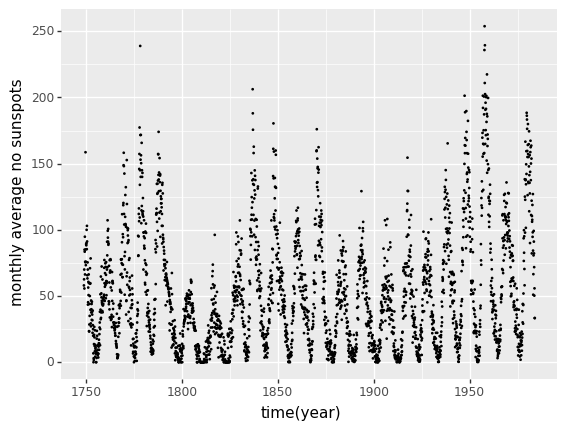

<ggplot: (114522232272)>

In [2]:
sunspots = pd.read_csv("sunspots.csv",index_col=0)
display(sunspots.head())

p = ggplot(aes(x='date', y='n'), sunspots) + geom_point(size=0.1) + xlab('time(year)')+  ylab('monthly average no sunspots')
p

### [loess](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/loess): Local Polynomial Regression Fitting 
loess(formula, data, weights, subset, na.action, model = FALSE,
      span = 0.75, enp.target, degree = 2,
      parametric = FALSE, drop.square = FALSE, normalize = TRUE,
      family = c("gaussian", "symmetric"),
      method = c("loess", "model.frame"),
      control = loess.control(…), …)
      
+ [statsmodels.nonparametric.smoothers_lowess.lowess](https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html)

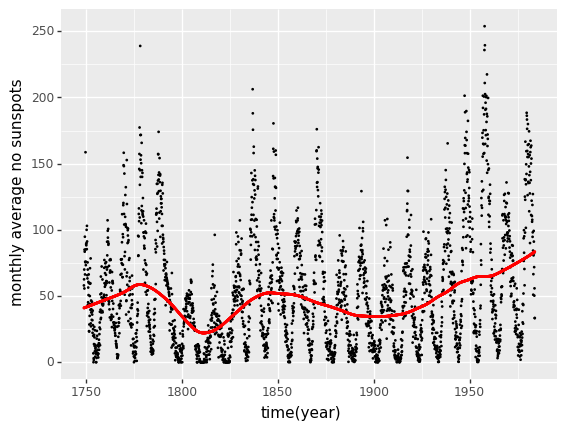

<ggplot: (114522070360)>

In [3]:
lowess = sm.nonparametric.lowess(sunspots["n"],sunspots["date"], frac=0.2)
#pr = ggplot(aes(x='date', y=lowess[:,1]), sunspots) + geom_line() # line plot
pr = p + geom_point(aes('date', lowess[:,1]), color='red',size=0.1)
pr

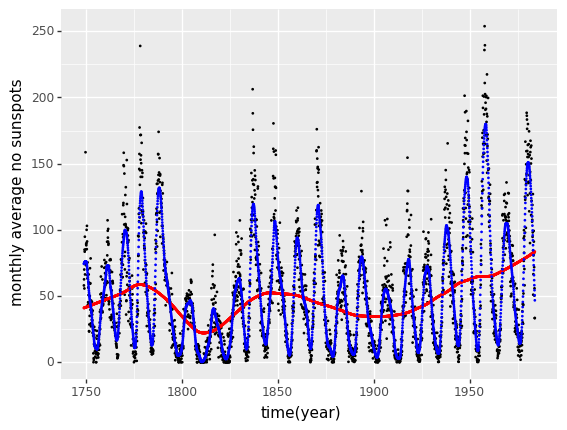

<ggplot: (114584993669)>

In [4]:
lowess = sm.nonparametric.lowess(sunspots["n"],sunspots["date"], frac=36/2820) # 3년단위 span
ppr = pr + geom_point(aes('date', lowess[:,1]), color='blue',size=0.1)
ppr

# TREES  

체리나무 31 그루에 대하여, Girth, Height, Volume 세 변수를 측정한 자료

trees 데이터 설명: [help(trees)](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/trees.html)



In [5]:
trees = pd.read_csv("trees.csv",index_col=0)
trees.head()

,g,h,v
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


https://seaborn.pydata.org/generated/seaborn.PairGrid.html


+ seaborn.regplot
```
lowessbool, optional
If True, use statsmodels to estimate a nonparametric lowess model (locally weighted linear regression). Note that confidence intervals cannot currently be drawn for this kind of model.
```

C:\Users\User\anaconda3\envs\MAS\lib\site-packages\seaborn\axisgrid.py:181: UserWarning: The label '_nolegend_' of <matplotlib.patches.Patch object at 0x000001AAA29309D0> starts with '_'. It is thus excluded from the legend.


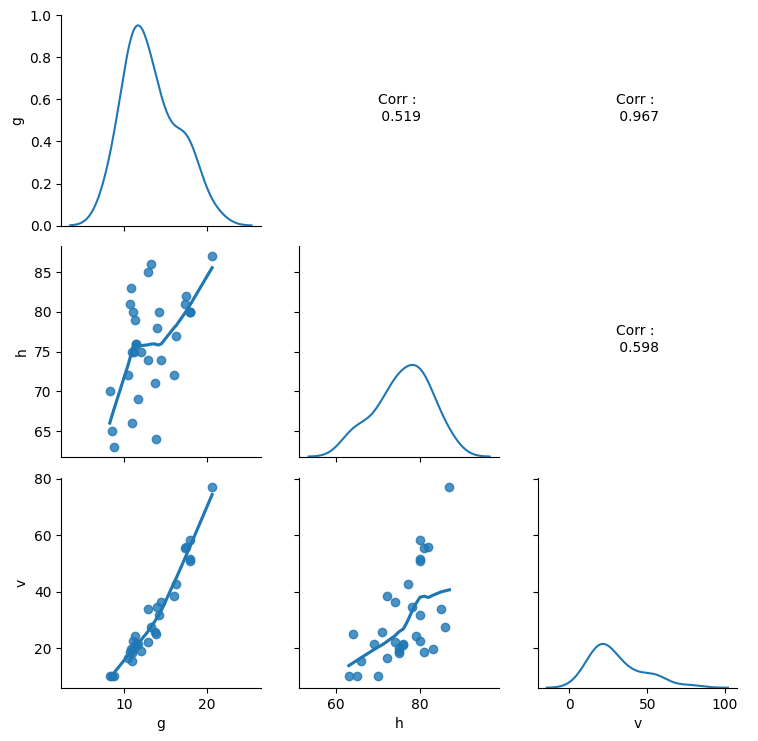

In [6]:
# https://stackoverflow.com/questions/63416894/correlation-values-in-pairplot
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = scipy.stats.pearsonr(x,y)
    ax.annotate('Corr : \n {:.3f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()


g = sns.PairGrid(trees)
g.map_diag(sns.kdeplot)
g.map_upper(reg_coef)
g.map_lower(sns.regplot,lowess=True)
g.add_legend()



#### 1. MARS를 이용한 평활 방법들


<br>

* **GAM** : Generalized Additive Model

* **MARS** : Multivariate Adaptive Regression Splines


* MARS 에 대한 소개: [MARS in wiki]   (https://en.wikipedia.org/wiki/Multivariate_adaptive_regression_splines)  

MARS 는 python에서는 pyearth를 쓰는데, 호환성 문제가 많다.  
영 설치가 안되면 함수를 구현하라

In [8]:
from pyearth import Earth

model = Earth()
model.fit(X,y)
    
#Print the model
print(model.trace())
print(model.summary())

ModuleNotFoundError: No module named 'pyearth'

## TODO

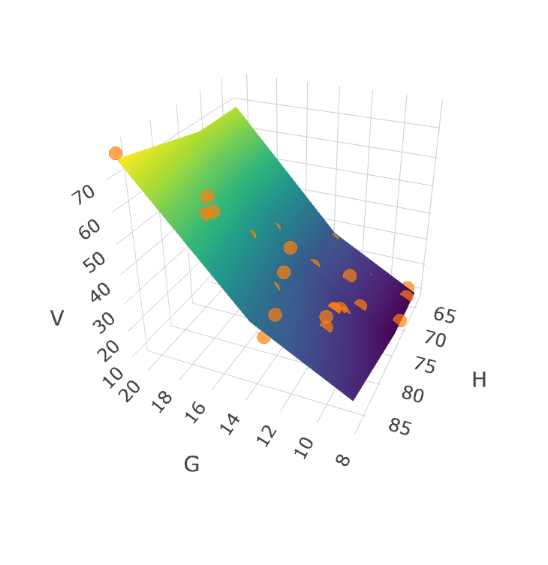



## TODO

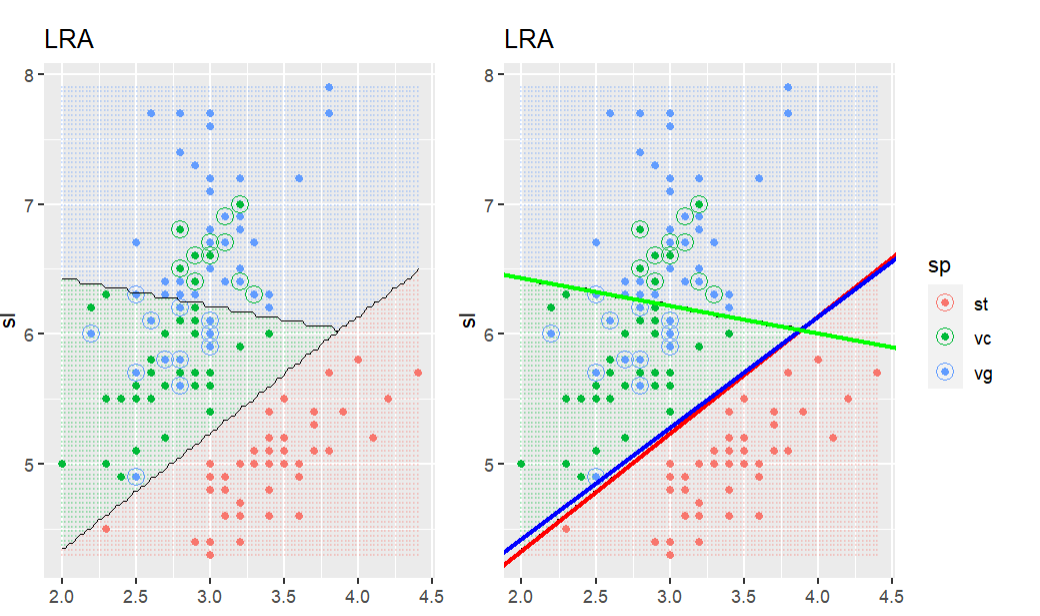